In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import matplotlib.axis as ax

In [2]:
data = pd.read_csv('data_for_lr.csv')

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
data=data.dropna()
print("Shape of the data :",data.shape)

Shape of the data : (699, 2)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


Splitting Data

In [8]:
#train input and outpuet
train_input =np.array(data.x[0:500]).reshape(500,1)
train_output =np.array(data.y[0:500]).reshape(500,1)

#test input and output
test_input =np.array(data.x[500:700]).reshape(199,1)
test_output =np.array(data.y[500:699]).reshape(199,1)

In [9]:
print(f"traing input data shape ={train_input.shape}")
print(f"traing output data shape ={train_output.shape}")
print(f"test input data shape ={test_input.shape}")
print(f"traing output data shape ={test_output.shape}")

traing input data shape =(500, 1)
traing output data shape =(500, 1)
test input data shape =(199, 1)
traing output data shape =(199, 1)


# Liner Regression

### Forward Propagation

f(x)=m*x+c

In [27]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions


# Cost Function

Summation (1/2n*(y-f(x))^2)

In [30]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

# Gradient Descent for Backpropagation 

### df= sum(f(x)+y)n

dm=df*x

dc=df*1

d(cost)

In [32]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

# Update parameters

m=m-(lerning_rate*dm)

c=c-(lerning_rate*dc)

In [13]:
def update_parameters(parameters,derivatives,learing_rate):
    parameters["m"]=parameters["m"]-learing_rate*derivatives['dm']
    parameters["c"]= parameters["c"] - learing_rate * derivatives['dc']

    return parameters

# Model Training 

In [28]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

# Training

Iteration = 1, Loss = 4178.981685961886


<Figure size 640x480 with 0 Axes>

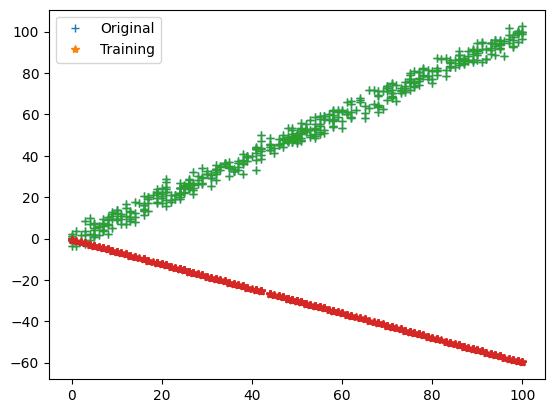

Iteration = 2, Loss = 1898.1508829642153


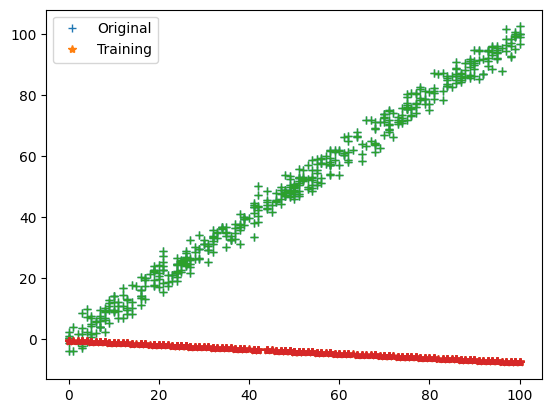

Iteration = 3, Loss = 863.3354209978315


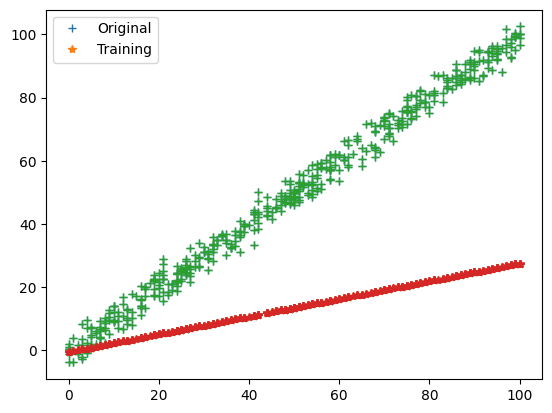

Iteration = 4, Loss = 393.83849939530353


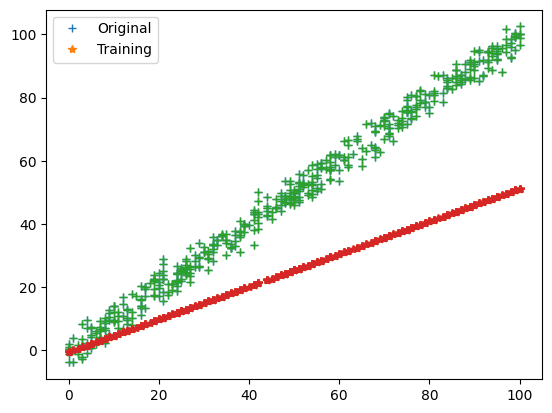

Iteration = 5, Loss = 180.82722572598655


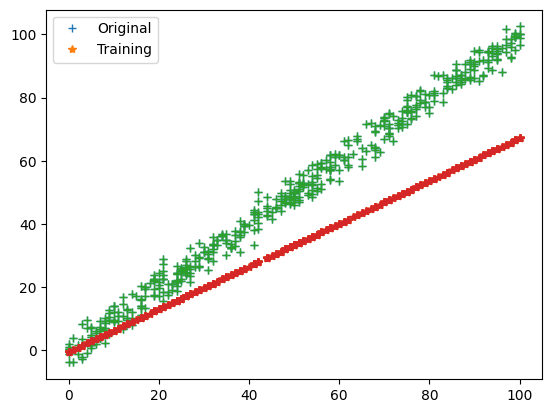

Iteration = 6, Loss = 84.18377461805733


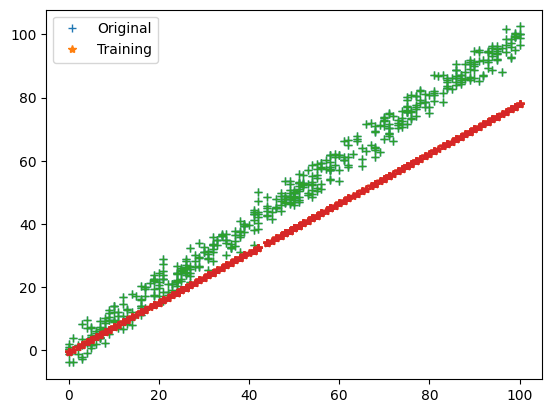

Iteration = 7, Loss = 40.33653350004129


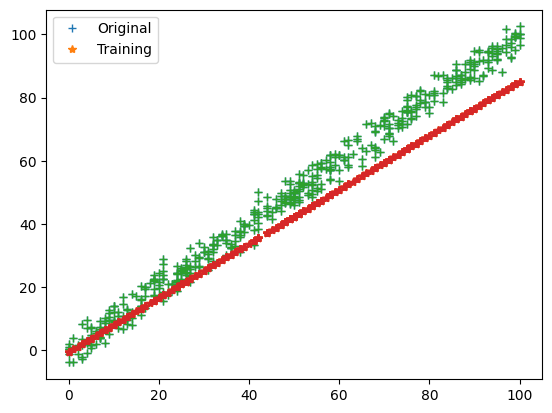

Iteration = 8, Loss = 20.44299133372225


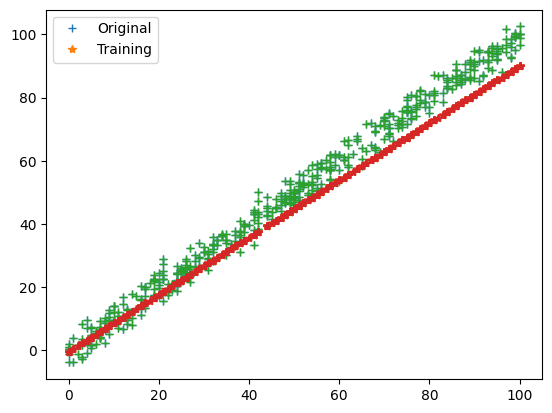

Iteration = 9, Loss = 11.417268913907698


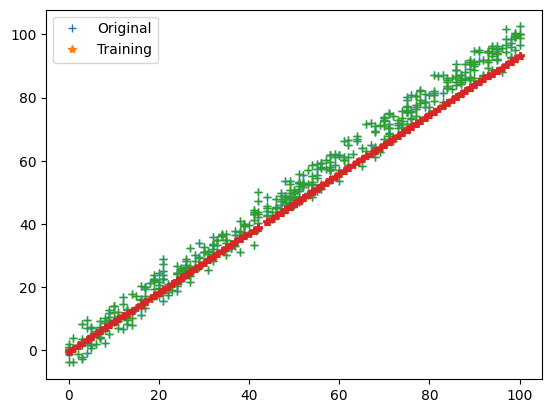

Iteration = 10, Loss = 7.322288350742585


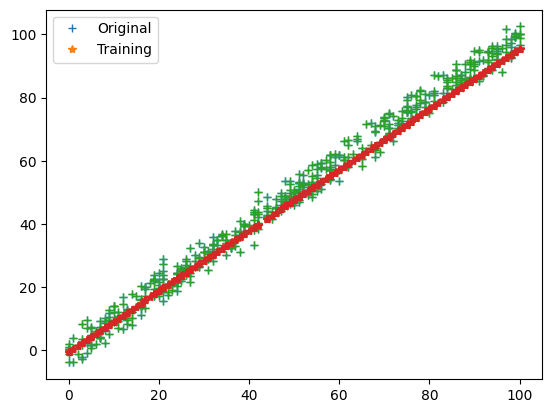

Iteration = 11, Loss = 5.464390829447539


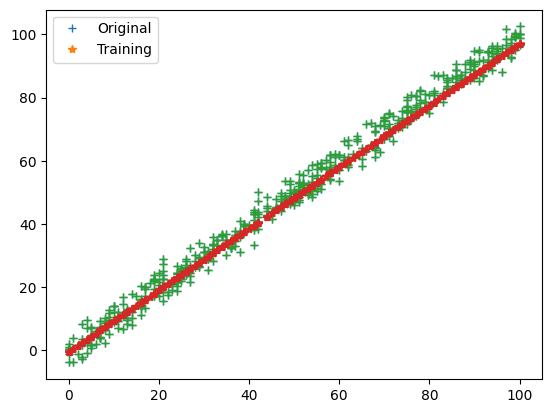

Iteration = 12, Loss = 4.621460362149642


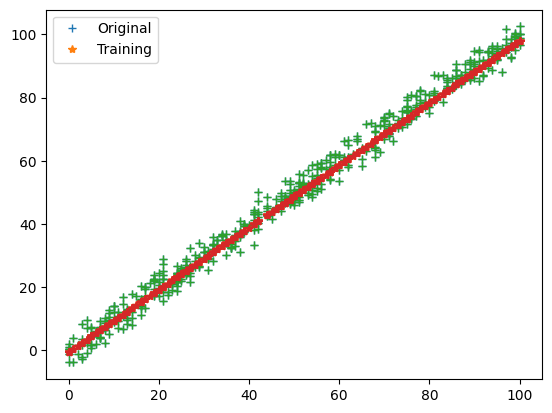

Iteration = 13, Loss = 4.239021571484899


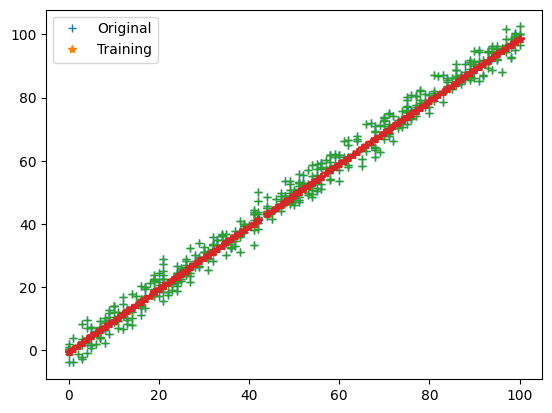

Iteration = 14, Loss = 4.065508364583481


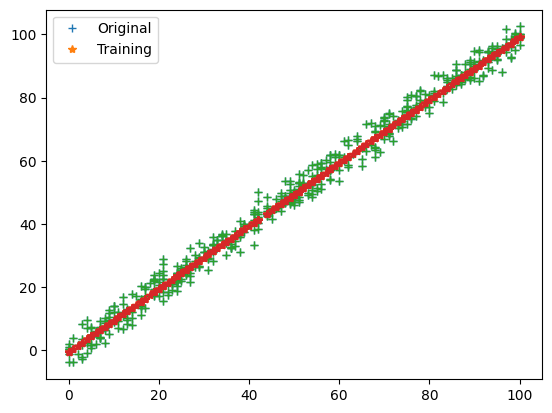

Iteration = 15, Loss = 3.9867849264653907


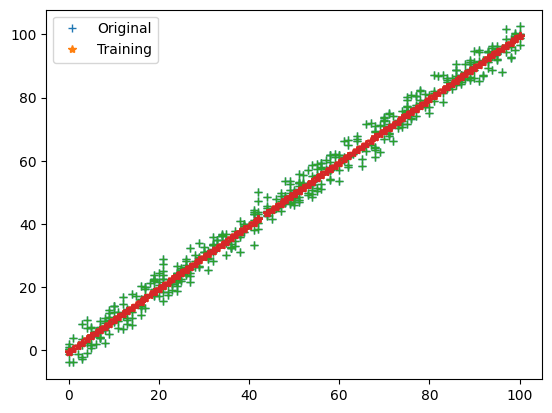

Iteration = 16, Loss = 3.9510677114526587


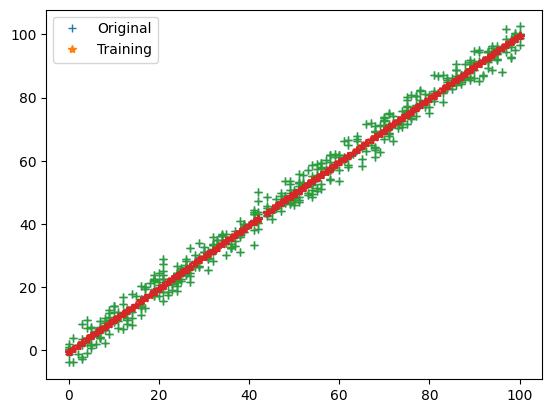

Iteration = 17, Loss = 3.934862467513608


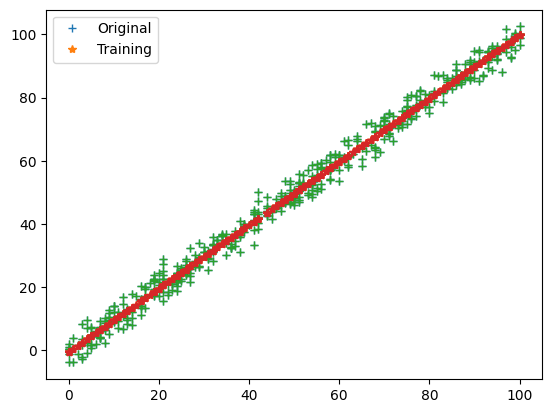

Iteration = 18, Loss = 3.9275098264782566


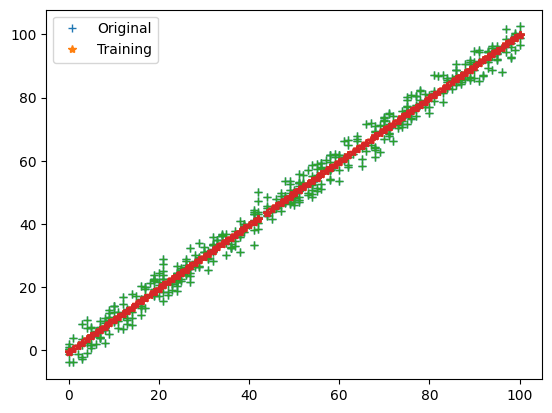

Iteration = 19, Loss = 3.924173621201132


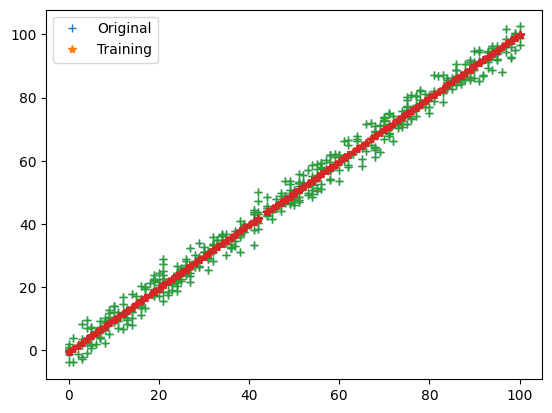

Iteration = 20, Loss = 3.9226596772915907


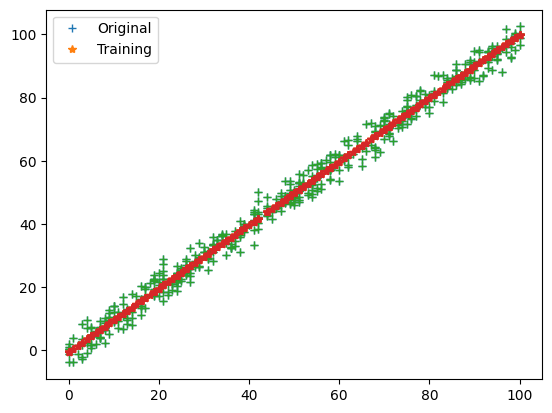

In [33]:
parameters, loss = train(train_input,train_output,0.0001,20)

In [34]:
print(parameters)

{'m': 1.0048912118004607, 'c': -0.5321174081041684}


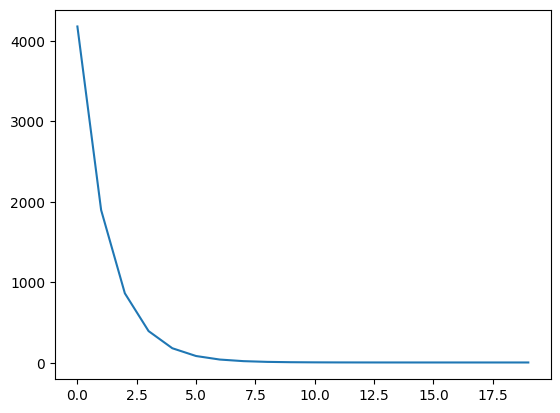

In [35]:
plt.plot(loss)

# Predict 

In [36]:
test_prediction = test_input * parameters['m']+parameters['c']

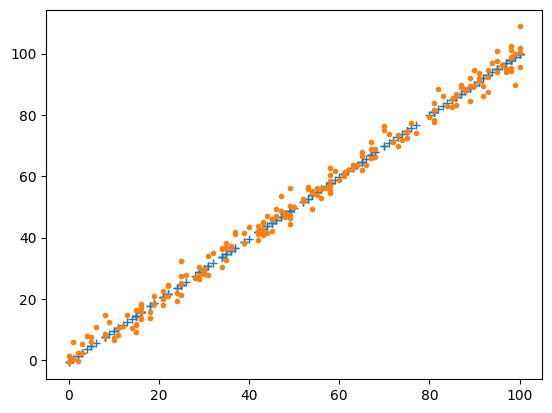

In [37]:
plt.plot(test_input,test_prediction,"+")
plt.plot(test_input,test_output,".")
plt.show()

# cost of prediction

In [38]:
cost_function(test_output,test_prediction)

4.069871696823602

In [ ]:
pred +- 4.06

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=309ce43a-e848-4c3f-b98c-9f3c69712ccd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>